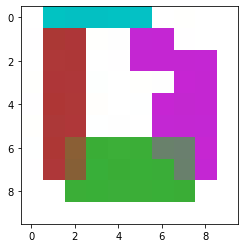

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Ouvrir l'image
img = Image.open('IMAGE.jpg')
#img = Image.open('bourget.jpg')

# Convertir l'image en une matrice numpy
image = np.asarray(img)
plt.imshow(image)

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self, V):
        self.V = V 
        self.graph = []
        
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])
        
    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])
    
    def union(self, parent, rank, x, y):
        root_x = self.find_parent(parent, x)
        root_y = self.find_parent(parent, y)
        
        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_y] = root_x
            rank[root_x] += 1
    
    

    def kruskal_mst(self):
        result = []
        i = 0 
        e = 0 #nombre d'arrêtes
        parent = []
        rank = []

        # Initialisation de parent et rank pour chaque nœud du graphe
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
            
        # Tri des bords en fonction de leur poids (troisième élément)
        self.graph = sorted(self.graph, key=lambda item: item[2])
        
        # Parcours des bords triés
        while e < self.V - 1:
            # Récupération des informations sur le prochain bord
            u, v, w = self.graph[i]
            i = i + 1

            # Recherche du parent de u et de v
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            # Si u et v n'ont pas le même parent, on peut ajouter l'arête au mst
            if x != y:
                e = e + 1
                result.append([u, v, w])
                # Union des deux sous-arbres enracinés à x et y
                self.union(parent, rank, x, y)

        # Calcul du coût total de l'arbre de recouvrement minimum
        mst_cost = sum([i[2] for i in result])
        # Retourne le coût et les arêtes de l'arbre de recouvrement minimum
        return mst_cost, result
    
     
def graph_from_image(image):
    img = Image.open(image).convert("RGB")
    width, height = img.size
    pixels = img.load()

    V = width * height # autant de sommets que de pixels
    graph = Graph(V)

    for i in range(width):
        for j in range(height):
            pixel = pixels[i, j]

            #on récupère les voisins de chaque pixels
            neighbors = []
            if i > 0:
                neighbors.append((i-1, j))
            if i < width-1:
                neighbors.append((i+1, j))
            if j > 0:
                neighbors.append((i, j-1))
            if j < height-1:
                neighbors.append((i, j+1))

            for n in neighbors:
                neighbor_pixel = pixels[n[0], n[1]] #récupère les valeurs RGB du pixel voisin
                weight = np.sqrt(sum((np.array(pixel) - np.array(neighbor_pixel))**2)) #distance euclidienne selon les valeurs RGB
                u = i * height + j #indice du pixel de base
                v = n[0] * height + n[1] #indice du pixel voisin
                graph.add_edge(u, v, weight)

    return graph

In [7]:
graph = graph_from_image("IMAGE.jpg")
mst_cost, mst_edges = graph.kruskal_mst()

In [8]:
# Définir la liste d'arêtes contenant les sommets u et v ainsi que le poids de l'arrête les reliant
def show_graph(edge_list):
    
    #On arrondit pour faciliter l'affichage ! attention, il faudra modifier l'arrondi
    for i in range(len(edge_list)):
        edge_list[i][2]=round(edge_list[i][2],2)
    
    # Créer un objet graphe avec les arêtes
    G = nx.Graph()
    G.add_weighted_edges_from(edge_list)

    # Créer une disposition rectangulaire des nœuds
    pos = {}
    width = 10 # largeur de l'image en pixels, on pourra faire rentrer l'image en paramètres
    height = 10 # hauteur de l'image en pixels
    i = 0
    for x in range(width):
        for y in range(height):
            pos[i] = (x, height-1-y)
            i += 1

    # Tracer le graphe avec les poids des arêtes
    nx.draw_networkx(G, pos=pos, with_labels=False, node_size=30)
    edge_labels = {(e[0], e[1]): e[2] for e in edge_list}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=8)

    # Afficher le graphe
    plt.gca().set_aspect('equal', adjustable='box')
    fig = plt.gcf()
    fig.set_size_inches(20, 20)

    # Enregistrement de l'image dans l'objet graph_plot
    # graph_plot = plt.gcf()
    plt.savefig('graphe2.jpg')
    plt.show()
    

Graphe pour l'image initiale:


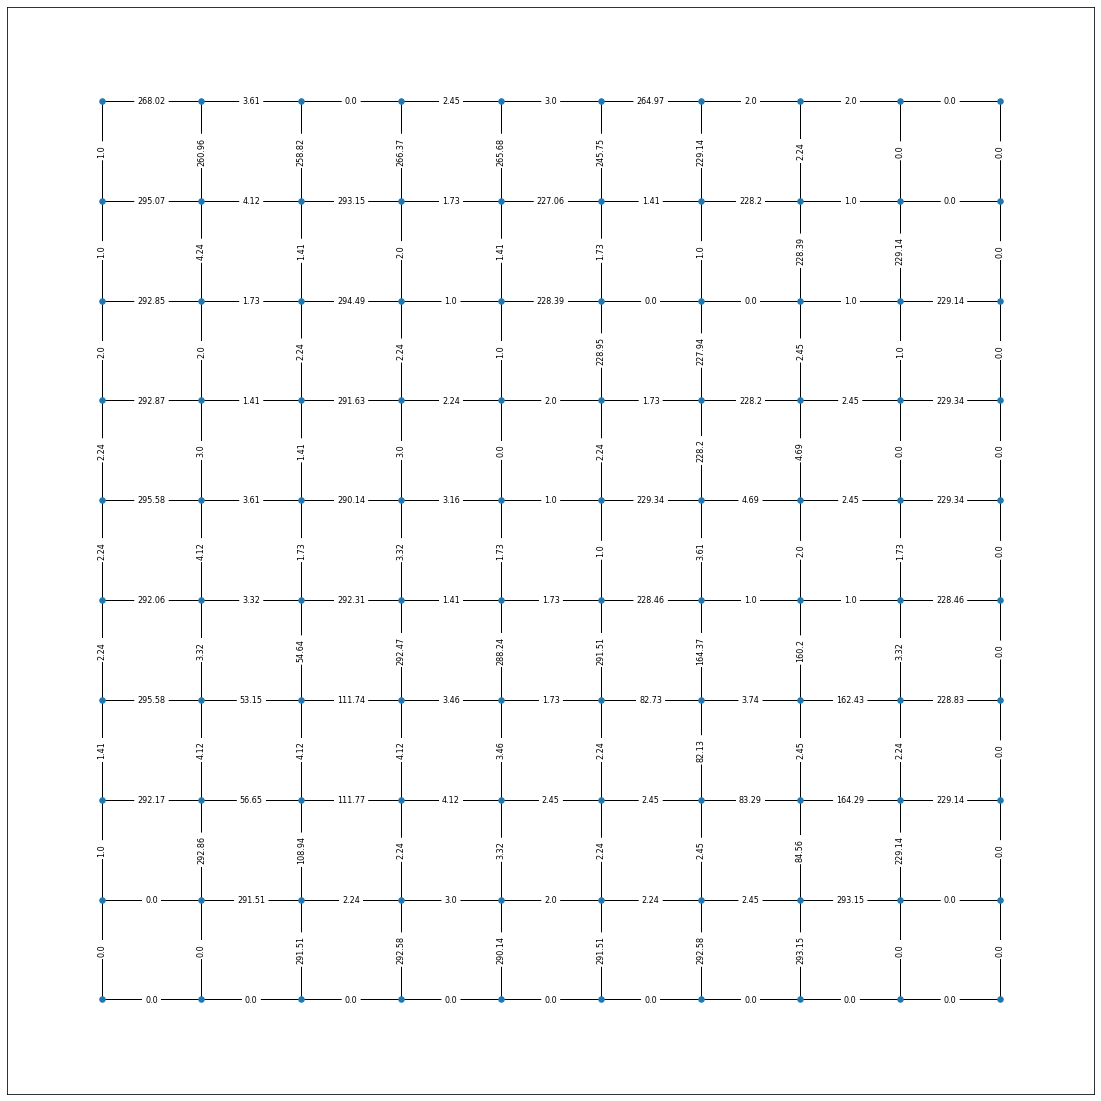

In [9]:
print("Graphe pour l'image initiale:")
show_graph(graph.graph)

Arbre couvrant de poids minimal de ce graphe


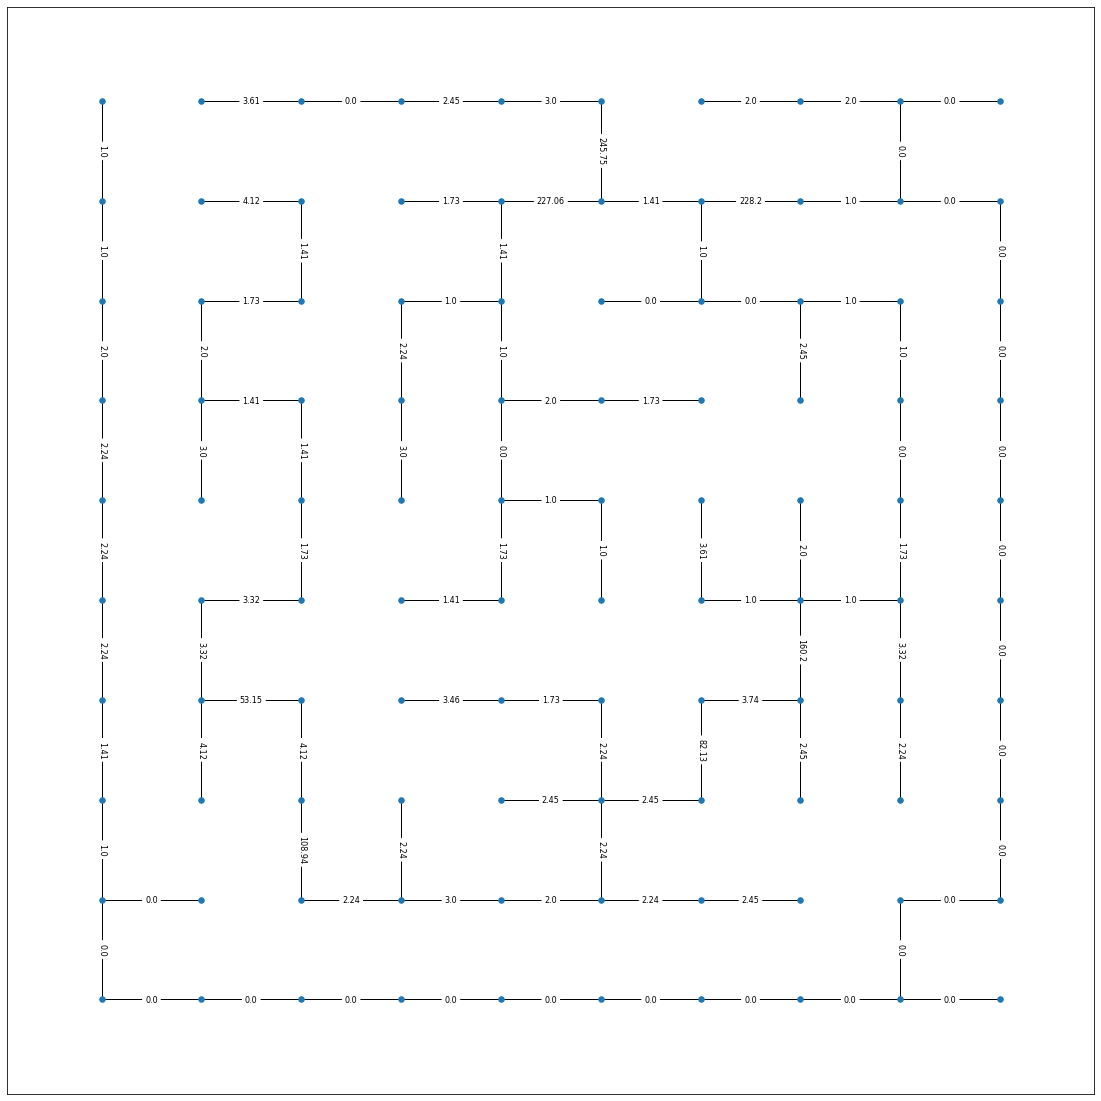

In [10]:
print("Arbre couvrant de poids minimal de ce graphe")
show_graph(mst_edges)

# SEGMENTATION

In [15]:
def segmentation_algorithm(V, E):
    # 0. Sort E into π = (o1, . . . , om), by non-decreasing edge weight.
    E.sort(key=lambda e: e[2])
    
    # 1. Start with a segmentation S0, where each vertex vi is in its own component
    S = [[v] for v in V]
    
    # 2. Repeat step 3 for q = 1, . . . , m
    for q in range(len(E)):
        
        (vi, vj, w) = E[q]
        Ci = Cj = None
        for i in range(len(S)):
            if vi in S[i]:
                Ci = i
            if vj in S[i]:
                Cj = i
            if Ci is not None and Cj is not None:
                break
        if Ci != Cj and w <= internal_difference(S[Ci], S[Cj]):
            S[Ci] += S[Cj]
            del S[Cj]
    
    return S

def internal_difference(Ci, Cj):
    diff_sum = 0
    for vi in Ci:
        for vj in Cj:
            diff_sum += abs(vi - vj)
    return diff_sum / (len(Ci) * len(Cj))


In [16]:
def segmented_image(V,E):
    S = segmentation_algorithm(V,E)
    
    segmented_img = np.zeros((10, 10))
    colors = np.linspace(0,255,11)
    for i in range(len(S)):
        color = colors[i]
        for v in S[i]:
            segmented_img[v%10,v//10] = color
    
    plt.imshow(segmented_img, cmap='gray')
    plt.show()

Image initiale:


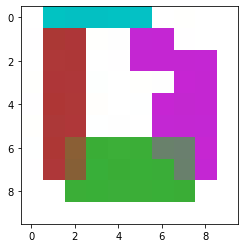

Image segmentée:


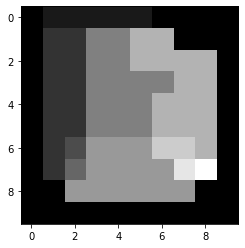

In [22]:
V = np.arange(100) #width * height
E = graph.graph
print("Image initiale:")
plt.imshow(image)
plt.show()
print("Image segmentée:")
segmented_image(V,E)

In [23]:
S = segmentation_algorithm(V,E)

In [24]:
S

[[0,
  1,
  2,
  3,
  4,
  5,
  60,
  70,
  6,
  71,
  7,
  80,
  90,
  81,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  88,
  98,
  8,
  18,
  9,
  19,
  29,
  39,
  49,
  59,
  69,
  79,
  89,
  99],
 [10, 20, 30, 40, 50],
 [11, 21, 15, 12, 22, 13, 23, 24, 25, 14, 16, 17],
 [26],
 [27],
 [31, 41, 32, 42, 43, 44, 54, 55, 35, 45, 53, 63, 33, 34],
 [36, 37, 28, 38, 47, 46, 56, 57, 48, 58, 68, 67, 78],
 [64, 74, 51, 61, 52, 62, 72, 82, 83, 84, 65, 75, 85, 73, 86],
 [66, 76],
 [77],
 [87]]